In [37]:
import numpy as np
import matplotlib.pyplot as plt

latexpreamble = r""" 
\usepackage{bm}
\usepackage{amsmath}

\renewcommand{\b}[1]    {\boldsymbol{#1}}
\renewcommand{\r}[1]    {\mathrm{#1}}
\renewcommand{\d}       {\partial}
"""

plt.rc("text.latex", preamble=latexpreamble)
plt.rc("font", family="sans-serif")

def plot_nusselt(filename):

    file = np.load(filename)

    t = file["t"]
    Nu1 = file["Nu_wb"]
    Nu2 = file["Nu_ε"]
    Nu3 = file["Nu_χ"]
    
    

    fig, ax = plt.subplots()
    plt.plot(t, Nu1, label=r"$ 1 + \kappa^{-1} \langle w b \rangle $")
    plt.plot(t, Nu2, label=r"$ 1 + \r{Pr} \langle | \nabla \bm{u} |^2 \rangle $")
    plt.plot(t, Nu3, label=r"$ \langle |\nabla b|^2 \rangle $")
        
    fig.suptitle(r"{}".format(filename.replace('_', '\_')))

    #plt.ylim(0, 20)
    plt.xlabel(r"$t$")
    plt.ylabel(r"Nusselt number")
    plt.legend()
    
    print("""
            Nusselt numbers, {:d} timesteps:
            Nu_wb  mean: {:.6f}, std: {:.4f}
            Nu_ε   mean: {:.6f}, std: {:.4f}
            Nu_χ   mean: {:.6f}, std: {:.4f}
    """.format(len(Nu1),
        np.mean(Nu1), np.std(Nu1), 
        np.mean(Nu2), np.std(Nu2), 
        np.mean(Nu3), np.std(Nu3))
    )


            Nusselt numbers, 7380 timesteps:
            Nu_wb  mean: 3.516645, std: 0.1290
            Nu_ε   mean: 3.521374, std: 0.0913
            Nu_χ   mean: 3.522647, std: 0.1137
    


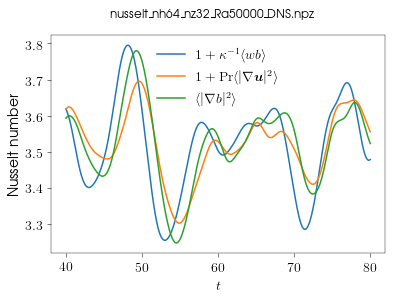

In [38]:
filenames = [
    "nusselt_nh64_nz32_Ra50000_DNS.npz",
]

for filename in filenames:
    plot_nusselt(filename)